# Quantitative Investing - Factors/Performance Indicators

---

### 1. Simple Moving Average (SMA)

$$
SMA_n = \frac{1}{n} \sum_{i=0}^{n-1}{P_{t-i}}
$$

Where:
- $P_t$ is the price in the moment $t$.
- $r_t$ is the simple return between $t$ and $t+1$.

Estrategy 1:

- Buy when the price crosses above the SMA, signaling a potential uptrend.
- Sell when the price falls below the SMA, indicating a likely downtrend.

Estrategy 2:
- Buy when the short-term SMA crosses above the long-term SMA, signaling a bullish crossover.
- Sell when the short-term SMA crosses below the long-term SMA, indicating a bearish reversal.

    - Most commonly used SMAs:

        -Short-term investing: 10-day and 20-day SMAs.

        -Long-term investing: 50-day and 200-day SMAs.

### 2. Moving Average Convergence Divergence (MACD)

$$
MACD_t = EMA_{12,t} - EMA_{26,t}
$$

$$
Signal_t = EMA_{9}(MACD_t)
$$

Where:
- $EMA_{12,t}$ and $EMA_{26,t}$ are price EMAs with 12 and 26 periods, respectively.
- $\text{Signal}_t$ is the signal line, calculated as a 9-period EMA of the MACD.

Strategy:
- Buy when the MACD crosses above the signal line, suggesting upward momentum.
- Sell when the MACD crosses below the signal line, indicating downward momentum.

    - Most commonly used EMAs:

| Strategy Type         | Short EMA | Long EMA | Signal |
|-----------------------|-----------|----------|--------|
| Very short-term       | 5         | 13       | 5      |
| Short-term            | 8         | 17       | 9      |
| Standard (default)    | 12        | 26       | 9      |
| Medium-term           | 19        | 39       | 9      |
| Long-term             | 21        | 50       | 10     |

#### 2.1. Exponential Moving Average (EMA)

$$
EMA_t = \alpha⋅P_t + (1−\alpha)⋅EMA_{t−1}
​$$
 
Where:
- $P_t$ is the price in the moment $t$.
- $\alpha = \frac{2}{n + 1}$ is the smoothing factor.
- $n$ es el número de periodos usados para calcular la media.

Strategy:
- Buy when the price crosses above the EMA, indicating strengthening momentum.
- Sell when the price falls below the EMA, suggesting weakening momentum.

### 3. Average True Range (ATR)

$$
TR_t = max(H_t - L_t, | H_t-C_{t-1} |, | L_t-C_{t-1} |)
$$

$$
ATR_n = SMA_{n}(TR_t)
$$

Where:
- $H_t$ is the high price in the moment t.
- $L_t$ is the low price in the moment t.
- $C_{t-1}$ is the closed price in the moment t.

### 4. Stochastic Oscilator

$$
\%K = \frac{C_t-L_n}{H_n-L_n} * 100
$$

$$
\%D = SMA_{n}(\%K)
$$

Where:
- $C_t$ is the current closing price
- $L_n$ is the lowest price over the last $n$ periods
- $H_n$ is the highest price over the last $n$ periods

Strategy:
- Buy when %K crosses above %D, especially when both are below 20 (oversold zone).
- Sell when %K crosses below %D, especially when both are above 80 (overbought zone).

### 5. Relative StrengtH Index (RSI)

$$
RS = \frac{Average Gain_n}{Average Loss_n}
$$

$$
RSI = 100 - (\frac{100}{1+RS})
$$


- $Average Gain_n = \frac{\sum{Gains}}{n}$

- $Average Loss_n = \frac{\sum{Losses}}{n}$

Where:
- If $ \Delta P_t = P_t - P_{t-1} > 1 $, it's a gain.
- If $ \Delta P_t = P_t - P_{t-1} < 0 $, it's a loss.

Strategy:
- Buy when RSI rises above 30, indicating recovery from oversold conditions.
- Sell when RSI falls below 70, suggesting a reversal from overbought levels.

### 6. Bollinger Bands

$$ Middle Band:  SMA_n  $$

​$$ Upper Band:  SMA_n + 2*SD_{P_n}  $$

$$ Lower Band:  SMA_n - 2*SD_{P_n}  $$

Strategy:
- Buy when price touches the lower band and starts to reverse upward.
- Sell when price touches the upper band and begins to turn downward.

### 7. Rate of Change (ROC)

$$
ROC_n = \left( \frac{C_t - C_{t-n}}{C_{t-n}} \right) \times 100
$$

Where:
- $C_t$ is the current closing price  
- $C_{t-n}$ is the closing price $n$ periods ago

Strategy:
- Buy when ROC crosses above 0, signaling bullish momentum.  
- Sell when ROC crosses below 0, indicating bearish momentum.

### 8. On-Balance Volume (OBV)

$$
OBV_t =
\begin{cases}
OBV_{t-1} + V_t, & \text{if } C_t > C_{t-1} \\\\
OBV_{t-1} - V_t, & \text{if } C_t < C_{t-1} \\\\
OBV_{t-1}, & \text{if } C_t = C_{t-1}
\end{cases}
$$

Where:
- $C_t$ is the current closing price  
- $V_t$ is the current volume

Strategy:
- Buy when OBV rises along with price, confirming an uptrend.  
- Sell when OBV falls while price rises or flattens, indicating divergence.



## Calculation and Visualization

##### Libraries 

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as pdr

import matplotlib.pyplot as plt
import seaborn as sns

import requests
import yfinance as yf

##### Import list of companies from the S&P 500

In [ ]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_list = df['Symbol'].tolist()
sp500_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'XYZ',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'COIN',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'CEG',


##### Import list of companies from the NASDAQ 100
\\ df = pd.read_html('https://en.wikipedia.org/wiki/Nasdaq-100')[4]

\\
nasdaq100_list = df.Ticker.to_list()


##### **Import Data from Yahoo Finance**

In [5]:
stocks = []
data = pd.DataFrame()

for ticker in sp500_list:
        data = yf.download(ticker, start = dt.datetime(2015,1,1), end = dt.date.today(), auto_adjust=False)
        data.columns = data.columns.droplevel(1)
        data['ticker'] = ticker
        stocks.append(data)

assets = pd.concat(stocks)

# Calculo de Retornos
assets['returns'] = assets.groupby('ticker')['Adj Close'].pct_change()
assets

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Price,Adj Close,Close,High,Low,Open,Volume,ticker,returns
Date,,,,,,,,
2015-01-02,96.967491,137.173920,138.026749,136.061874,137.717392,2531214.0,MMM,NaN
2015-01-05,94.780632,134.080261,136.822739,133.846161,136.287628,4416708.0,MMM,-0.022552
2015-01-06,93.769936,132.650497,134.924744,131.889633,134.464890,4224272.0,MMM,-0.010664
2015-01-07,94.449615,133.612045,134.013382,132.892975,133.695648,3685235.0,MMM,0.007248
2015-01-08,96.713348,136.814377,136.864548,134.214050,134.322739,3758908.0,MMM,0.023968
...,...,...,...,...,...,...,...,...
2025-08-11,149.020004,149.020004,149.809998,147.350006,147.669998,3065300.0,ZTS,0.011334
2025-08-12,149.770004,149.770004,149.880005,148.309998,148.910004,2578500.0,ZTS,0.005033
2025-08-13,152.440002,152.440002,152.759995,148.919998,149.619995,3331100.0,ZTS,0.017827


##### **Chose Company**

In [6]:
company = 'AAPL'
startt = pd.to_datetime('2024-01-01')
endt = pd.to_datetime(dt.date.today())

#### Simple Moving Average (SMA)

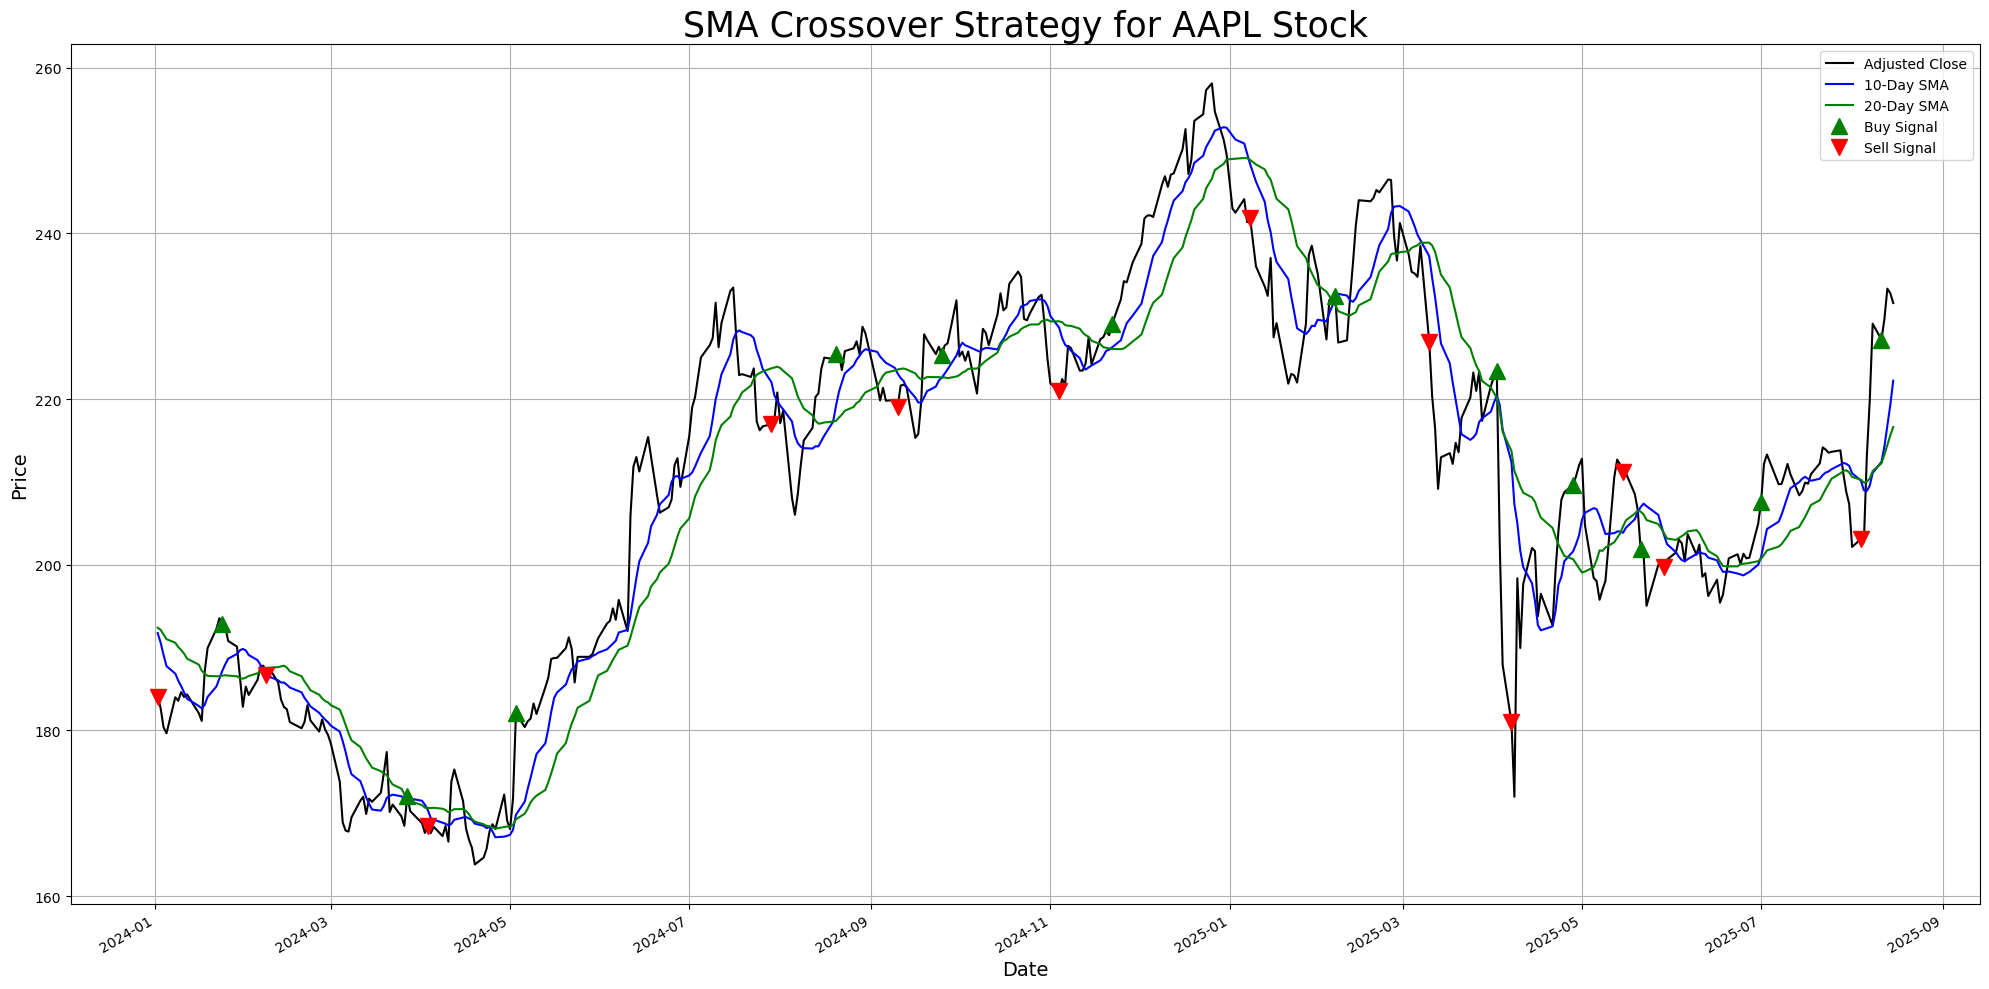

In [7]:
# --- Calculate SMAs ---
assets['SMA_10'] = assets.groupby('ticker')['Adj Close'].transform(lambda x: x.rolling(window=10).mean())
assets['SMA_20'] = assets.groupby('ticker')['Adj Close'].transform(lambda x: x.rolling(window=20).mean())

# --- Generate Signal: Buy (1.0) if short-term SMA crosses above long-term SMA ---
assets['SMA_Ratio'] = assets['SMA_10'] / assets['SMA_20']
assets['SMA_Indicator_Action'] = np.where(assets['SMA_Ratio'] > 1, 1.0, 0.0)
assets['SMA_Indicator_Position'] = assets.groupby('ticker')['SMA_Indicator_Action'].diff()

# --- Filter Data for Selected Company ---
share = assets[assets['ticker'] == company].copy()
share = share[(share.index >= startt) & (share.index <= endt)]

# --- Plotting ---
plt.figure(figsize=(20, 10))
    # Plot closing price and SMAs
share['Adj Close'].plot(color='black', label='Adjusted Close')
share['SMA_10'].plot(color='blue', label='10-Day SMA')
share['SMA_20'].plot(color='green', label='20-Day SMA')
    # Plot Buy signals
plt.plot(share[share['SMA_Indicator_Position'] == 1].index,
         share['Adj Close'][share['SMA_Indicator_Position'] == 1],
         '^', markersize=12, color='green', label='Buy Signal')
    # Plot Sell signals
plt.plot(share[share['SMA_Indicator_Position'] == -1].index,
         share['Adj Close'][share['SMA_Indicator_Position'] == -1],
         'v', markersize=12, color='red', label='Sell Signal')
    # Labels and Title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title(f'SMA Crossover Strategy for {company} Stock', fontsize=25)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Moving Average Convergence Divergence (MACD)

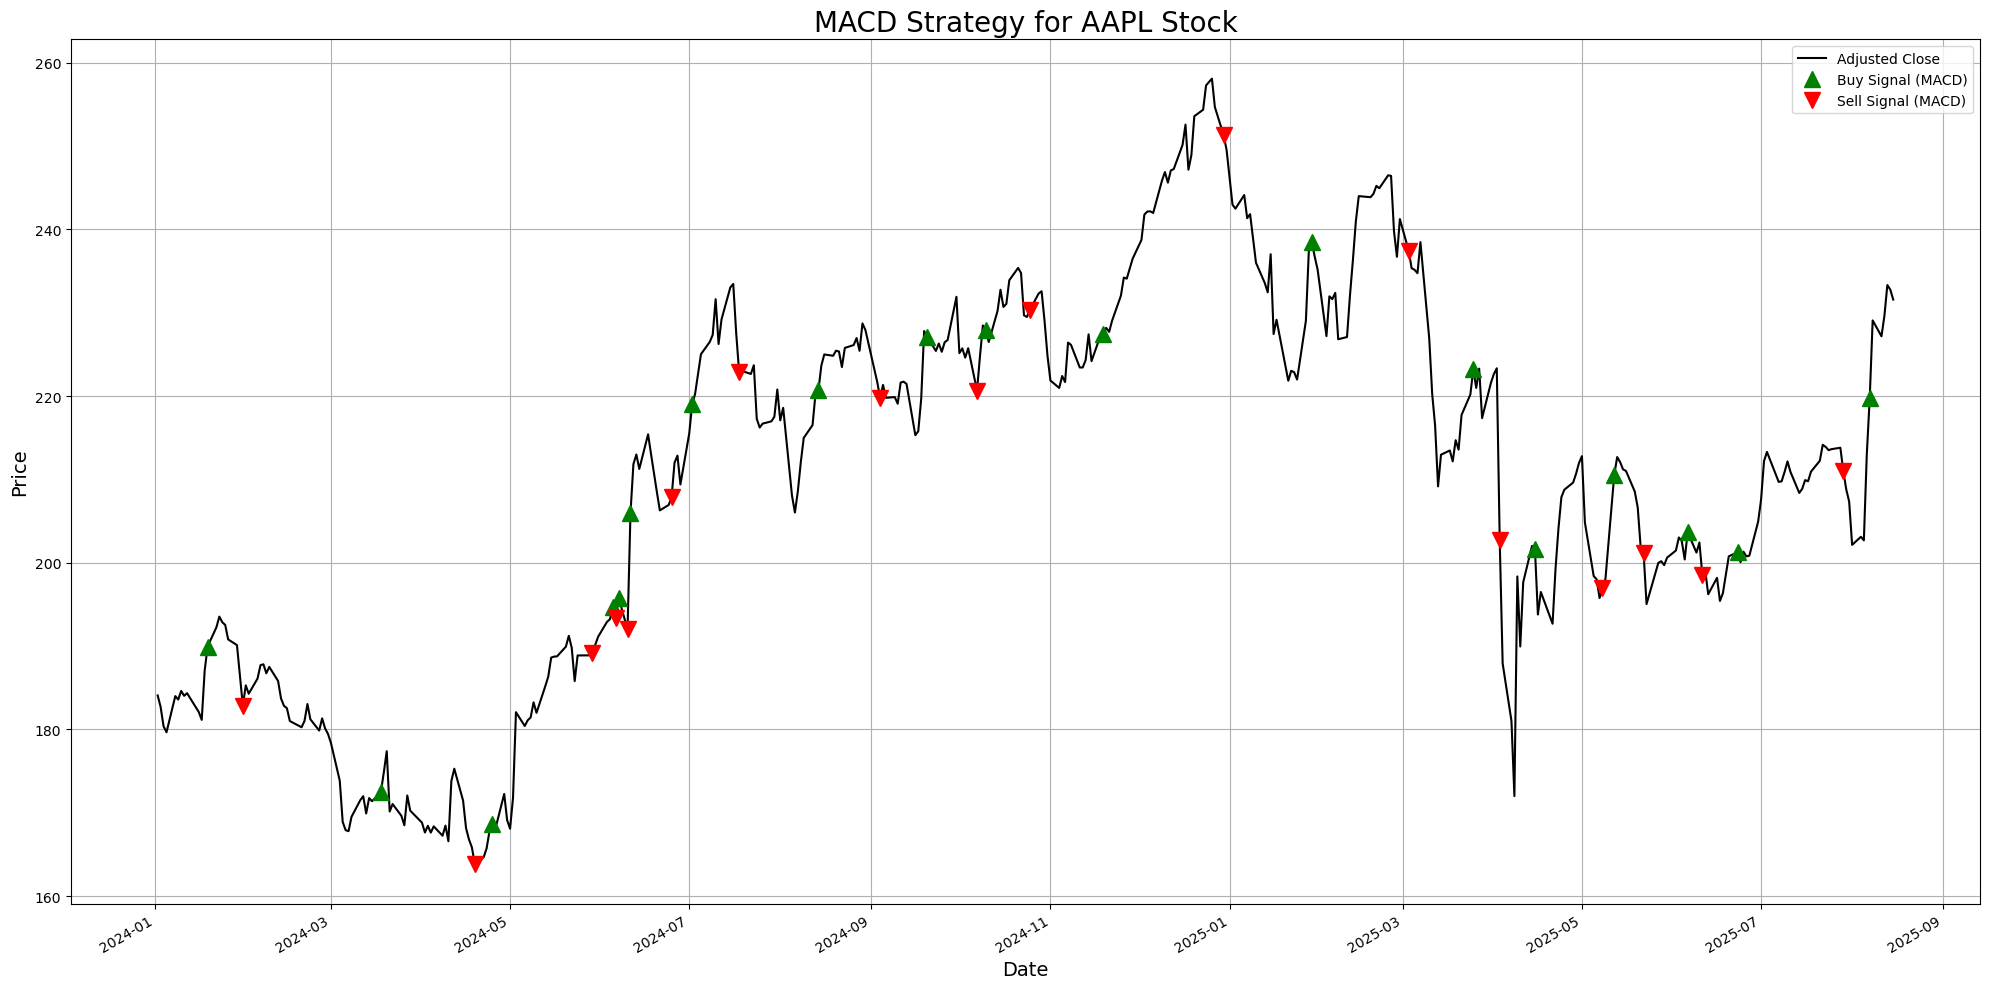

In [8]:
# --- Calculate EMAs ---
assets['EMA_12'] = assets.groupby('ticker')['Adj Close'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
assets['EMA_26'] = assets.groupby('ticker')['Adj Close'].transform(lambda x: x.ewm(span=26, adjust=False).mean())

# --- Calculate MACD Line and Signal Line ---
assets['MACD_Value'] = assets['EMA_12'] - assets['EMA_26']
assets['MACD_Signal'] = assets.groupby('ticker')['MACD_Value'].transform(lambda x: x.ewm(span=9, adjust=False).mean())

# --- Generate Buy/Sell Signals based on MACD crossover ---
assets['MACD_Signal_Action'] = np.where(assets['MACD_Value'] > assets['MACD_Signal'], 1.0, 0.0)
assets['MACD_Signal_Position'] = assets.groupby('ticker')['MACD_Signal_Action'].diff()

# --- Filter Data for Selected Company ---
share = assets[assets['ticker'] == company].copy()
share = share[(share.index >= startt) & (share.index <= endt)]

# --- Plotting ---
plt.figure(figsize=(20, 10))
    # Plot closing price and EMAs
share['Adj Close'].plot(color='black', label='Adjusted Close')
    # Plot Buy signals
plt.plot(share[share['MACD_Signal_Position'] == 1].index,
         share['Adj Close'][share['MACD_Signal_Position'] == 1],
         '^', markersize=12, color='green', label='Buy Signal (MACD)')
    # Plot Sell signals
plt.plot(share[share['MACD_Signal_Position'] == -1].index,
         share['Adj Close'][share['MACD_Signal_Position'] == -1],
         'v', markersize=12, color='red', label='Sell Signal (MACD)')
# Plot Labels and Title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title(f'MACD Strategy for {company} Stock', fontsize=20)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

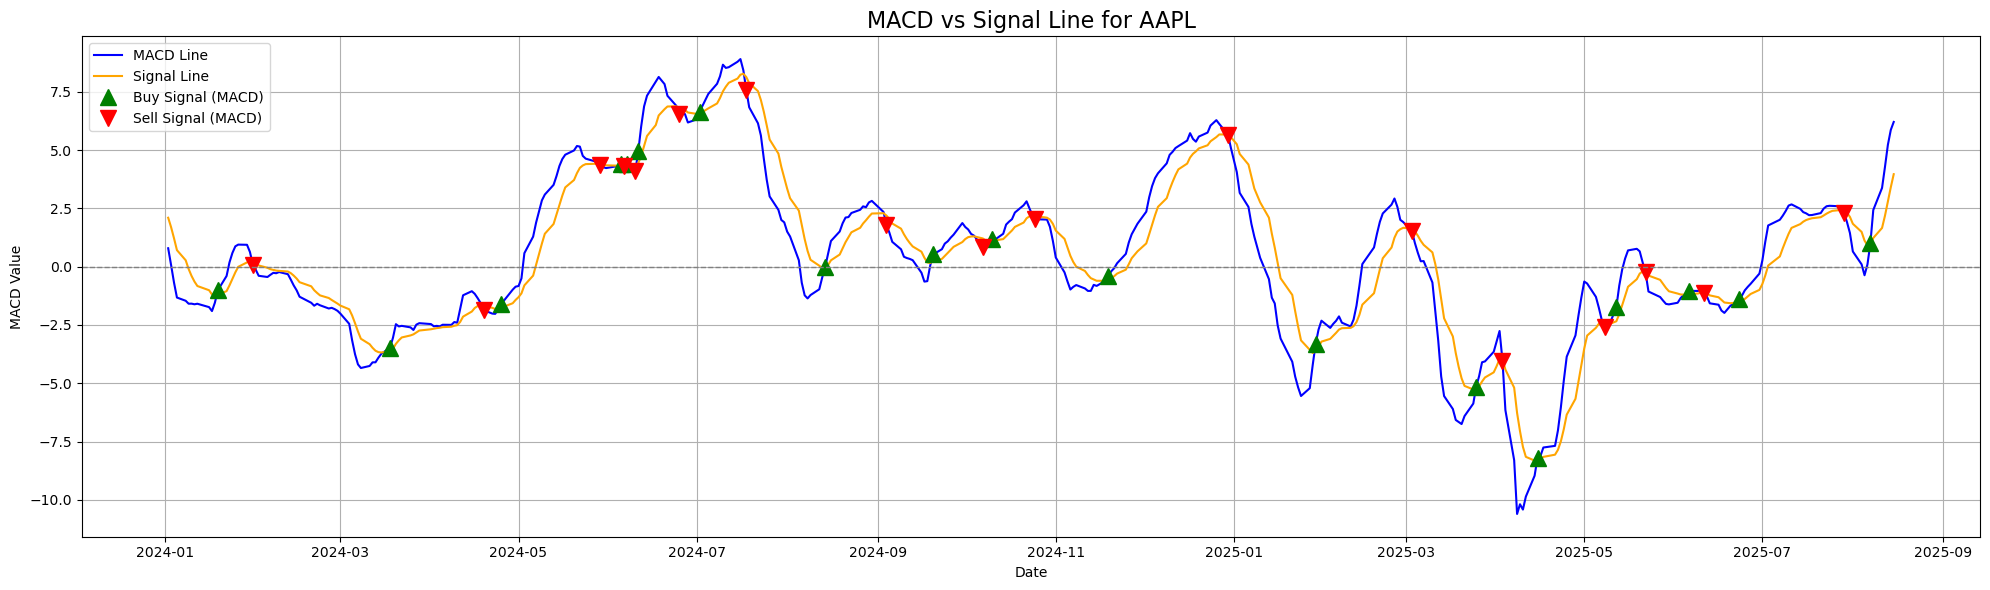

In [9]:
# --- Plot MACD & Signal line separately ---
plt.figure(figsize=(20, 6))
plt.plot(share.index, share['MACD_Value'], label='MACD Line', color='blue')
plt.plot(share.index, share['MACD_Signal'], label='Signal Line', color='orange')
    # Plot Buy signals
plt.plot(share[share['MACD_Signal_Position'] == 1].index,
         share['MACD_Value'][share['MACD_Signal_Position'] == 1],
         '^', markersize=12, color='green', label='Buy Signal (MACD)')
    # Plot Sell signals
plt.plot(share[share['MACD_Signal_Position'] == -1].index,
         share['MACD_Value'][share['MACD_Signal_Position'] == -1],
         'v', markersize=12, color='red', label='Sell Signal (MACD)')
plt.axhline(0, linestyle='--', color='grey', linewidth=1)
plt.title(f'MACD vs Signal Line for {company}', fontsize=16)
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Average True Range (ATR)

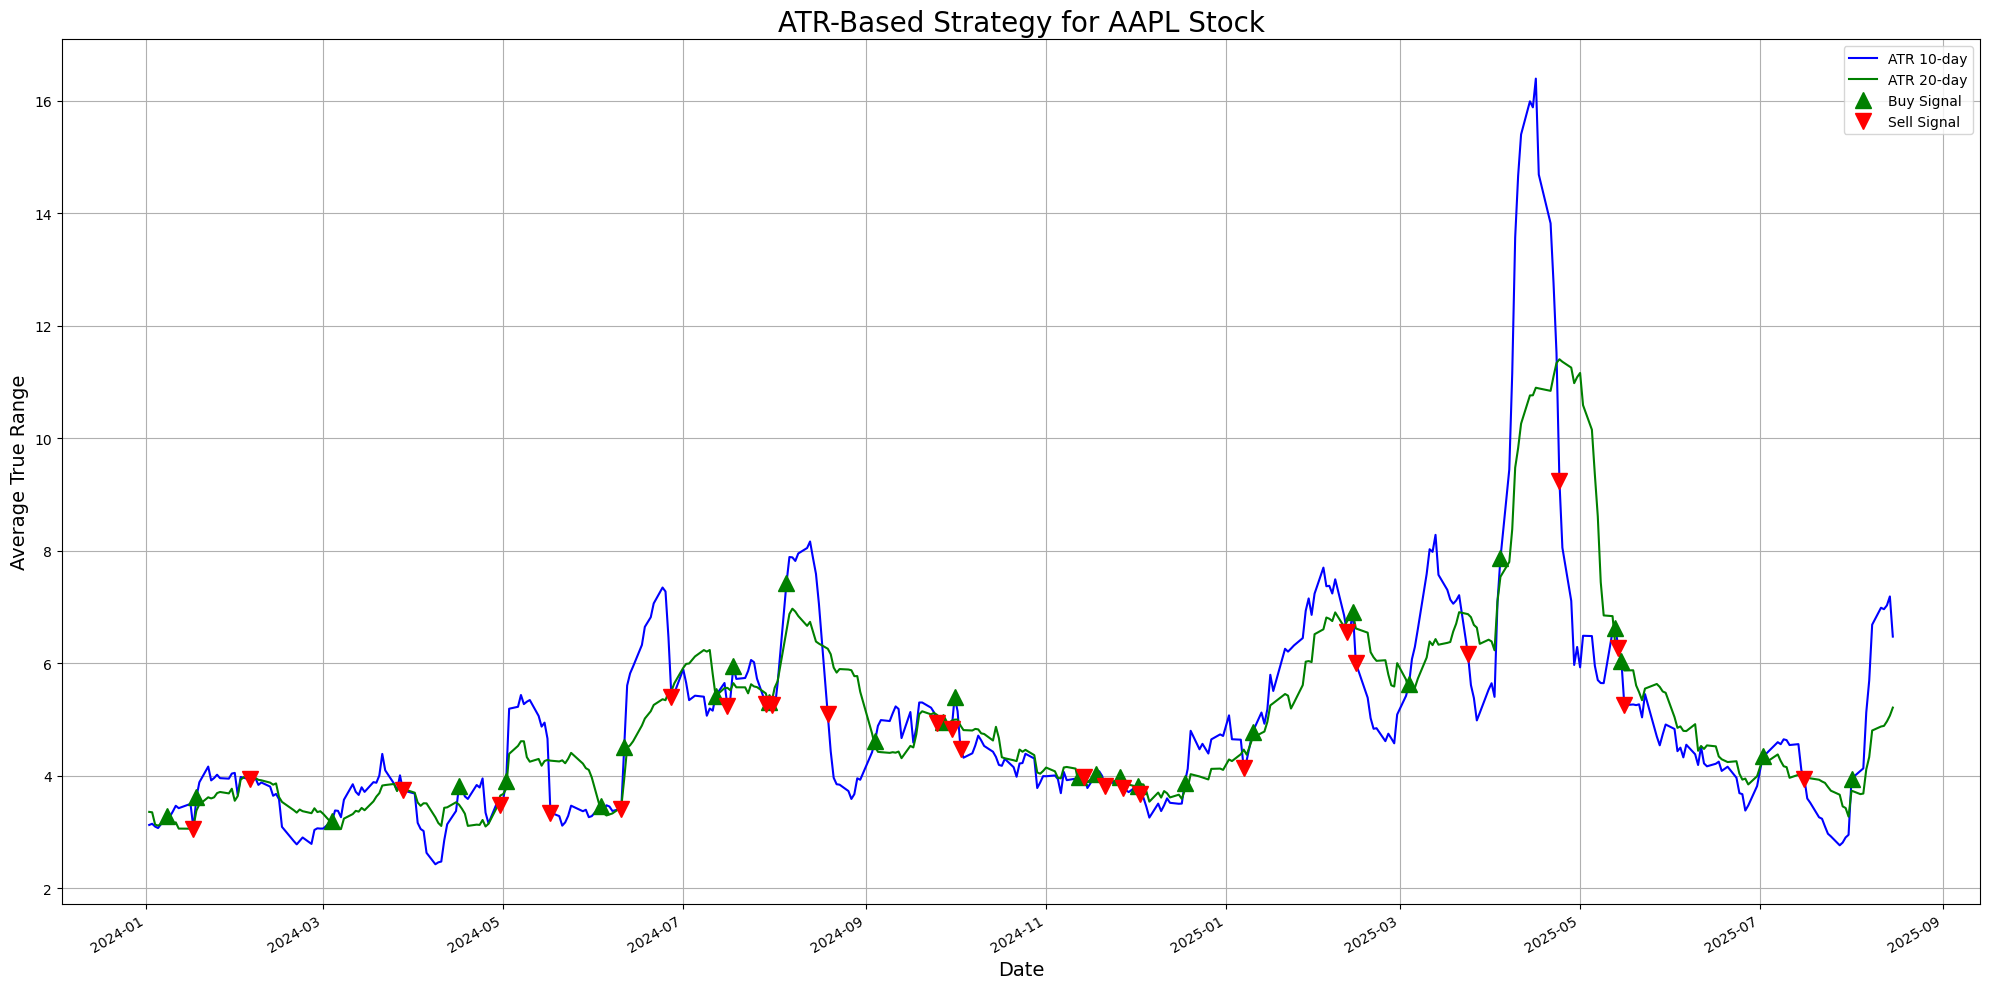

In [10]:
# --- Calculate True Range (TR) ---
assets['TR'] = np.maximum(
    assets['High'] - assets['Low'],
    np.maximum(
        abs(assets['High'] - assets['Adj Close'].shift(1)),
        abs(assets['Low'] - assets['Adj Close'].shift(1))
    )
)

# --- Calculate ATR (Average True Range) ---
assets['ATR_10'] = assets.groupby('ticker')['TR'].transform(lambda x: x.rolling(window=10).mean())    # Short-term (1 week)
assets['ATR_20'] = assets.groupby('ticker')['TR'].transform(lambda x: x.rolling(window=20).mean())  # Long-term (1 month)

# --- ATR Ratio ---
assets['ATR_Ratio'] = assets['ATR_20'] / assets['ATR_10']

# --- Generate Buy/Sell Signals ---
assets['ATR_Indicator_Action'] = np.where(assets['ATR_Ratio'] < 1, 1.0, 0.0)
assets['ATR_Indicator_Position'] = assets.groupby('ticker')['ATR_Indicator_Action'].diff()

# --- Filter Company Data ---
share = assets[assets['ticker'] == company].copy()
share = share[(share.index >= startt) & (share.index <= endt)]

# --- Plotting ---
plt.figure(figsize=(20, 10))
    # Plot short-term and long-term ATR
share['ATR_10'].plot(color='blue', label='ATR 10-day')
share['ATR_20'].plot(color='green', label='ATR 20-day')
    # Plot Buy signals
plt.plot(share[share['ATR_Indicator_Position'] == 1].index,
         share['ATR_10'][share['ATR_Indicator_Position'] == 1],
         '^', markersize=12, color='green', label='Buy Signal')
    # Plot Sell signals
plt.plot(share[share['ATR_Indicator_Position'] == -1].index,
         share['ATR_10'][share['ATR_Indicator_Position'] == -1],
         'v', markersize=12, color='red', label='Sell Signal')
    # Labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average True Range', fontsize=14)
plt.title(f'ATR-Based Strategy for {company} Stock', fontsize=20)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Stochastic Oscilators

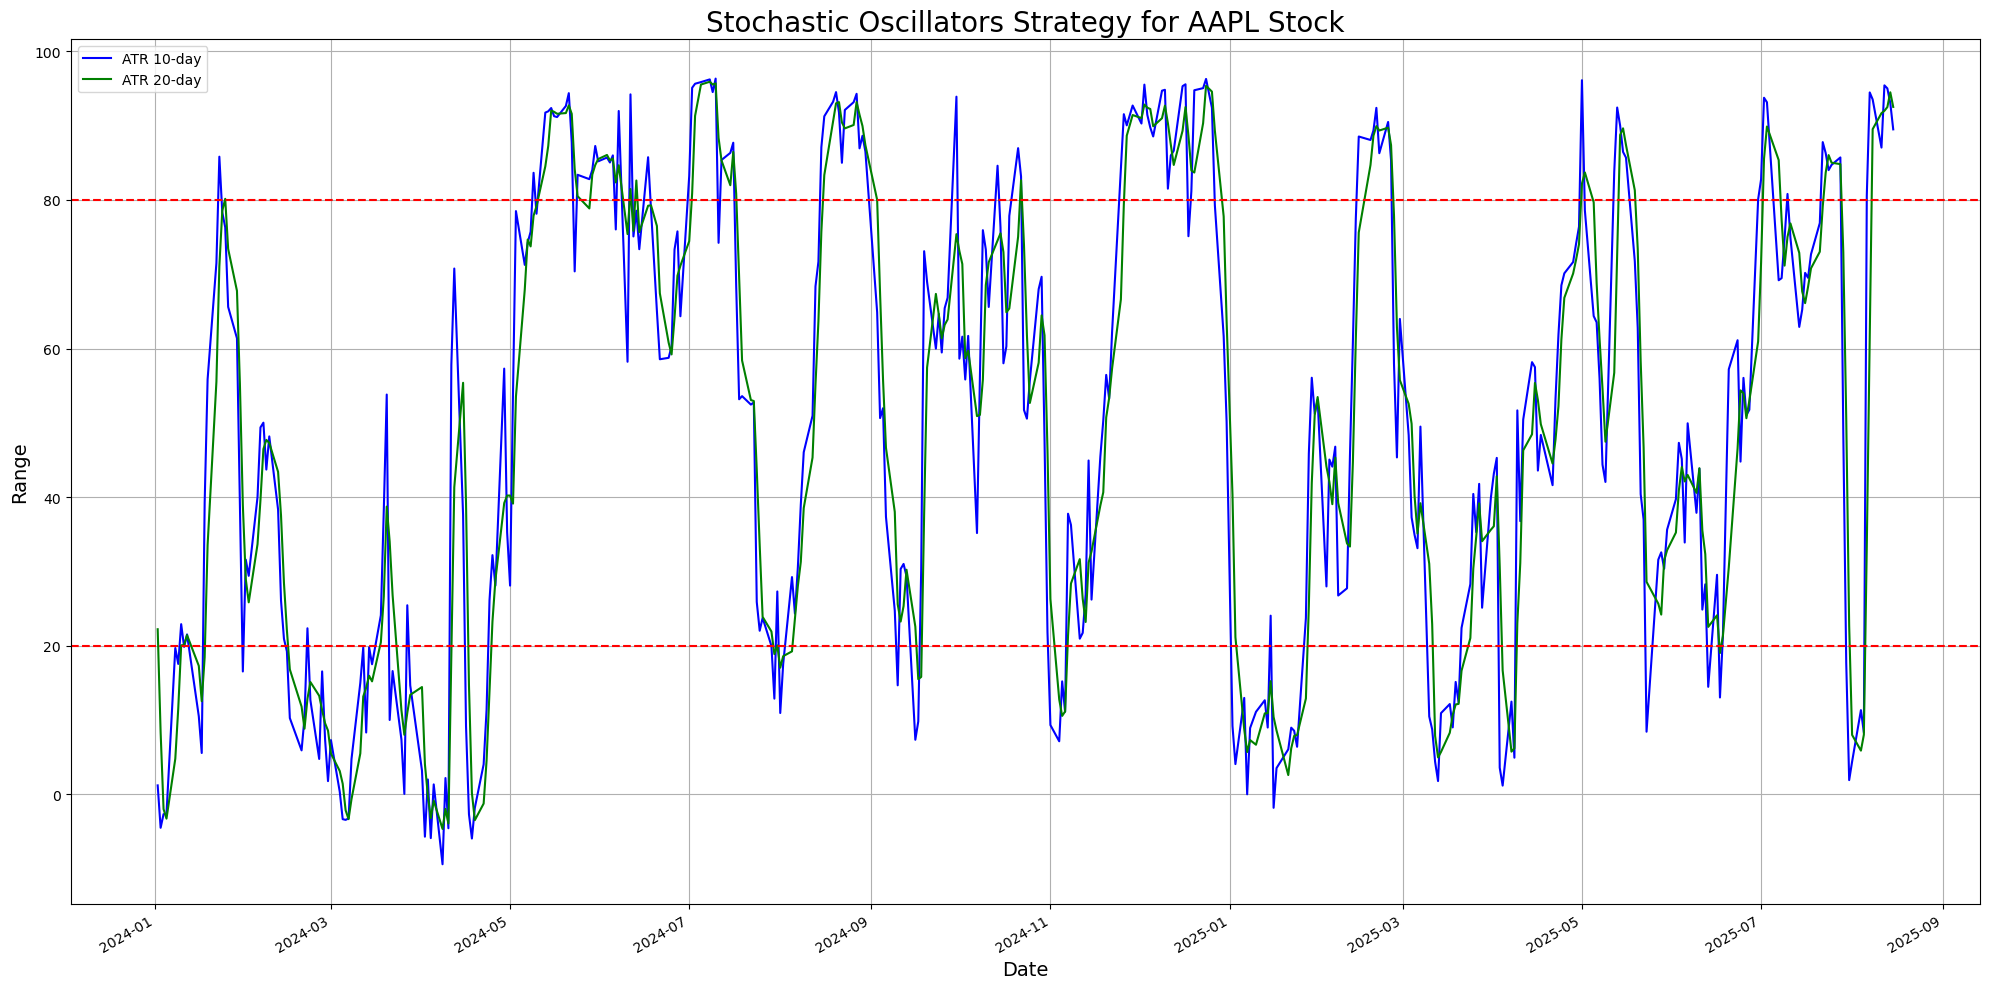

In [11]:
# --- Calculate Oscilators to 20 days ---
assets['Low_20'] = assets.groupby('ticker')['Low'].transform(lambda x: x.rolling(window = 20).min())
assets['High_20'] = assets.groupby('ticker')['High'].transform(lambda x: x.rolling(window = 20).max())

# --- Calculate %D and %K ---
assets['%K_line'] = ((assets['Adj Close'] - assets['Low_20'])/(assets['High_20'] - assets['Low_20']))*100
assets['%D_line'] = assets['%K_line'].rolling(window = 3).mean()

# --- Filter Company Data ---
share = assets[assets['ticker'] == company].copy()
share = share[(share.index >= startt) & (share.index <= endt)]

# --- Plotting ---
plt.figure(figsize=(20, 10))
    # Plot short-term and long-term ATR
share['%K_line'].plot(color='blue', label='ATR 10-day')
share['%D_line'].plot(color='green', label='ATR 20-day')
    # Lines
plt.axhline(20, linestyle='--', color="red")
plt.axhline(80, linestyle="--", color="red")
    # Labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Range', fontsize=14)
plt.title(f'Stochastic Oscillators Strategy for {company} Stock', fontsize=20)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Relative Strengeth Index (RSI)

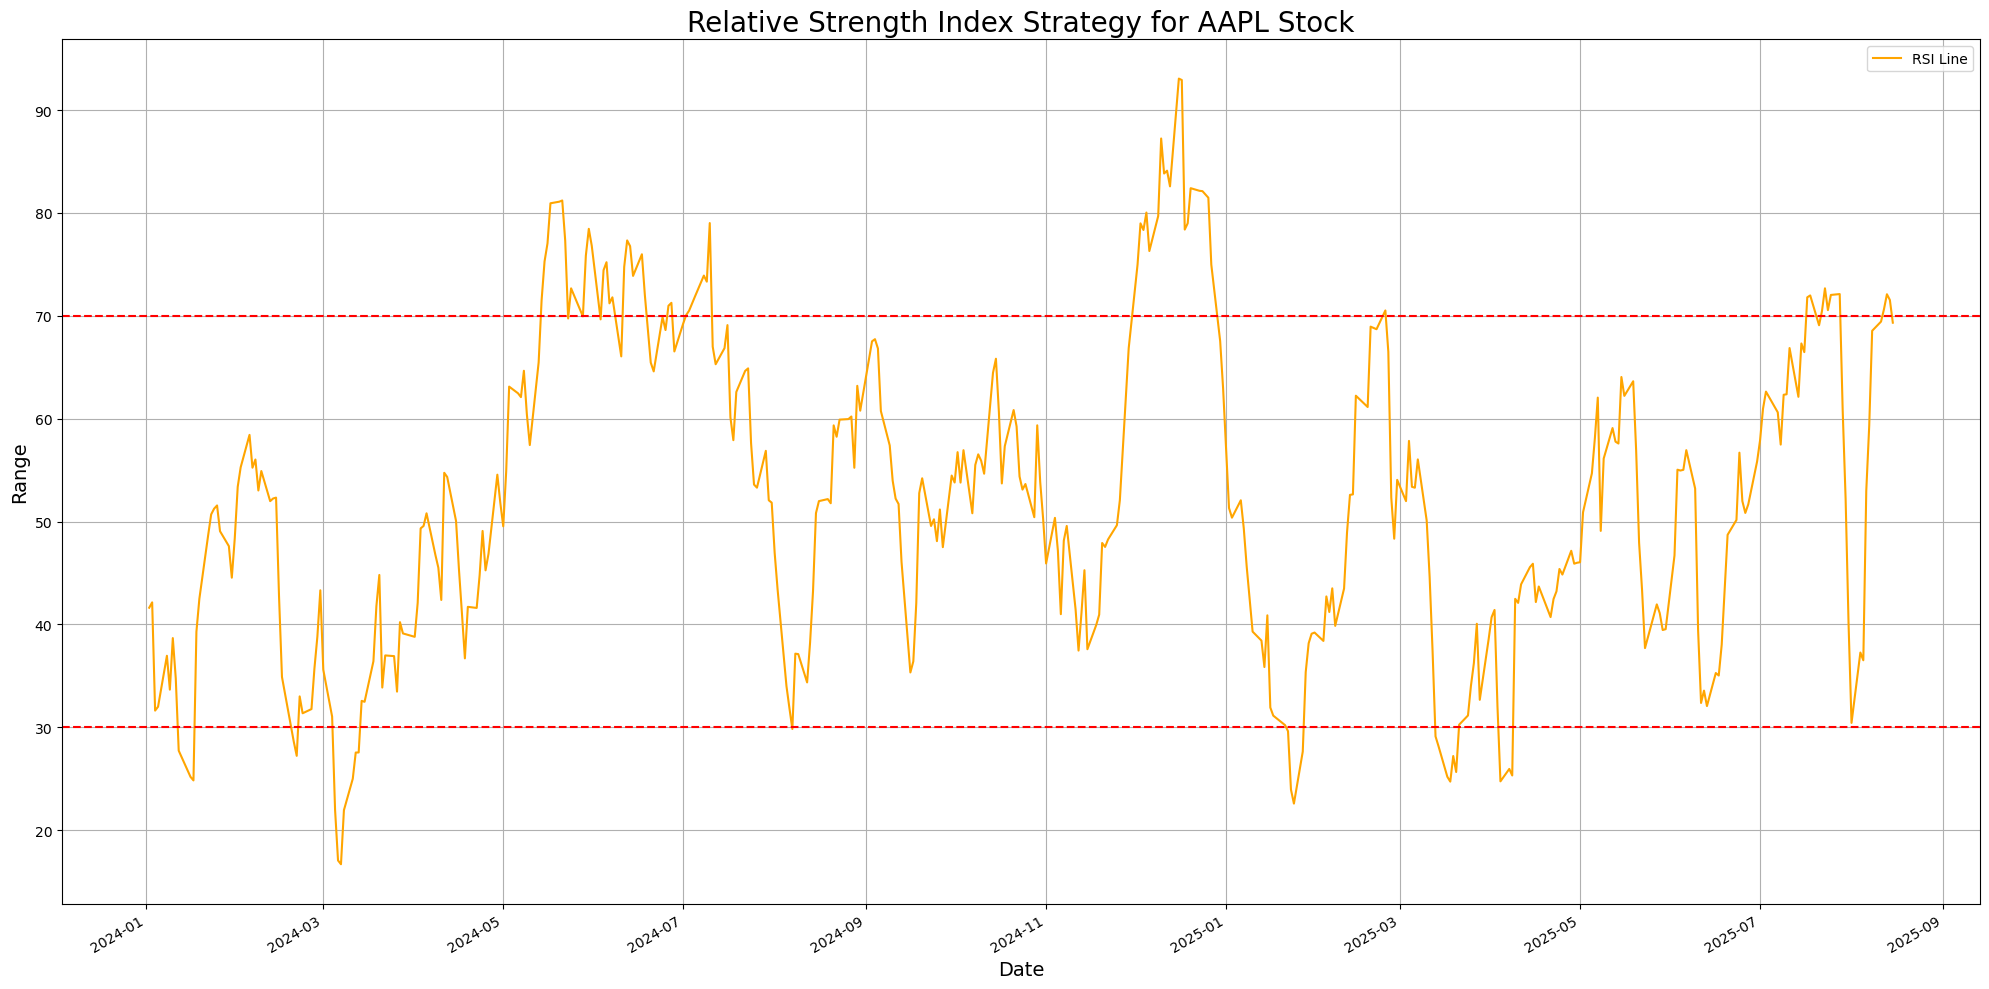

In [12]:
# --- Calculate Gains and Losses over 20 day ---
assets['Net'] = assets.groupby('ticker')['Adj Close'].transform(lambda x: x.diff())
assets['Gain'] = assets['Net'].clip(lower=0).round(2)
assets['Loss'] = assets['Net'].clip(upper=0).abs().round(2)
    # --- Calculate the Average ---
assets['Avg_Gain'] = assets.groupby('ticker')['Gain'].transform(lambda x: x.rolling(window=20).mean())
assets['Avg_Loss'] = assets.groupby('ticker')['Loss'].transform(lambda x: x.rolling(window=20).mean())

# --- Calculate RS and RSI ---
assets['RS_Line'] = assets['Avg_Gain'] / assets['Avg_Loss']
assets['RSI_Line'] = 100 - (100/(1+assets['RS_Line']))

# --- Filter Company Data ---
share = assets[assets['ticker'] == company].copy()
share = share[(share.index >= startt) & (share.index <= endt)]

# --- Plotting ---
plt.figure(figsize=(20, 10))
    # Plot short-term and long-term ATR
share['RSI_Line'].plot(color='orange', label='RSI Line')
    # Lines
plt.axhline(30, linestyle='--', color="red")
plt.axhline(70, linestyle="--", color="red")
    # Labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Range', fontsize=14)
plt.title(f'Relative Strength Index Strategy for {company} Stock', fontsize=20)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Bollinger Bands

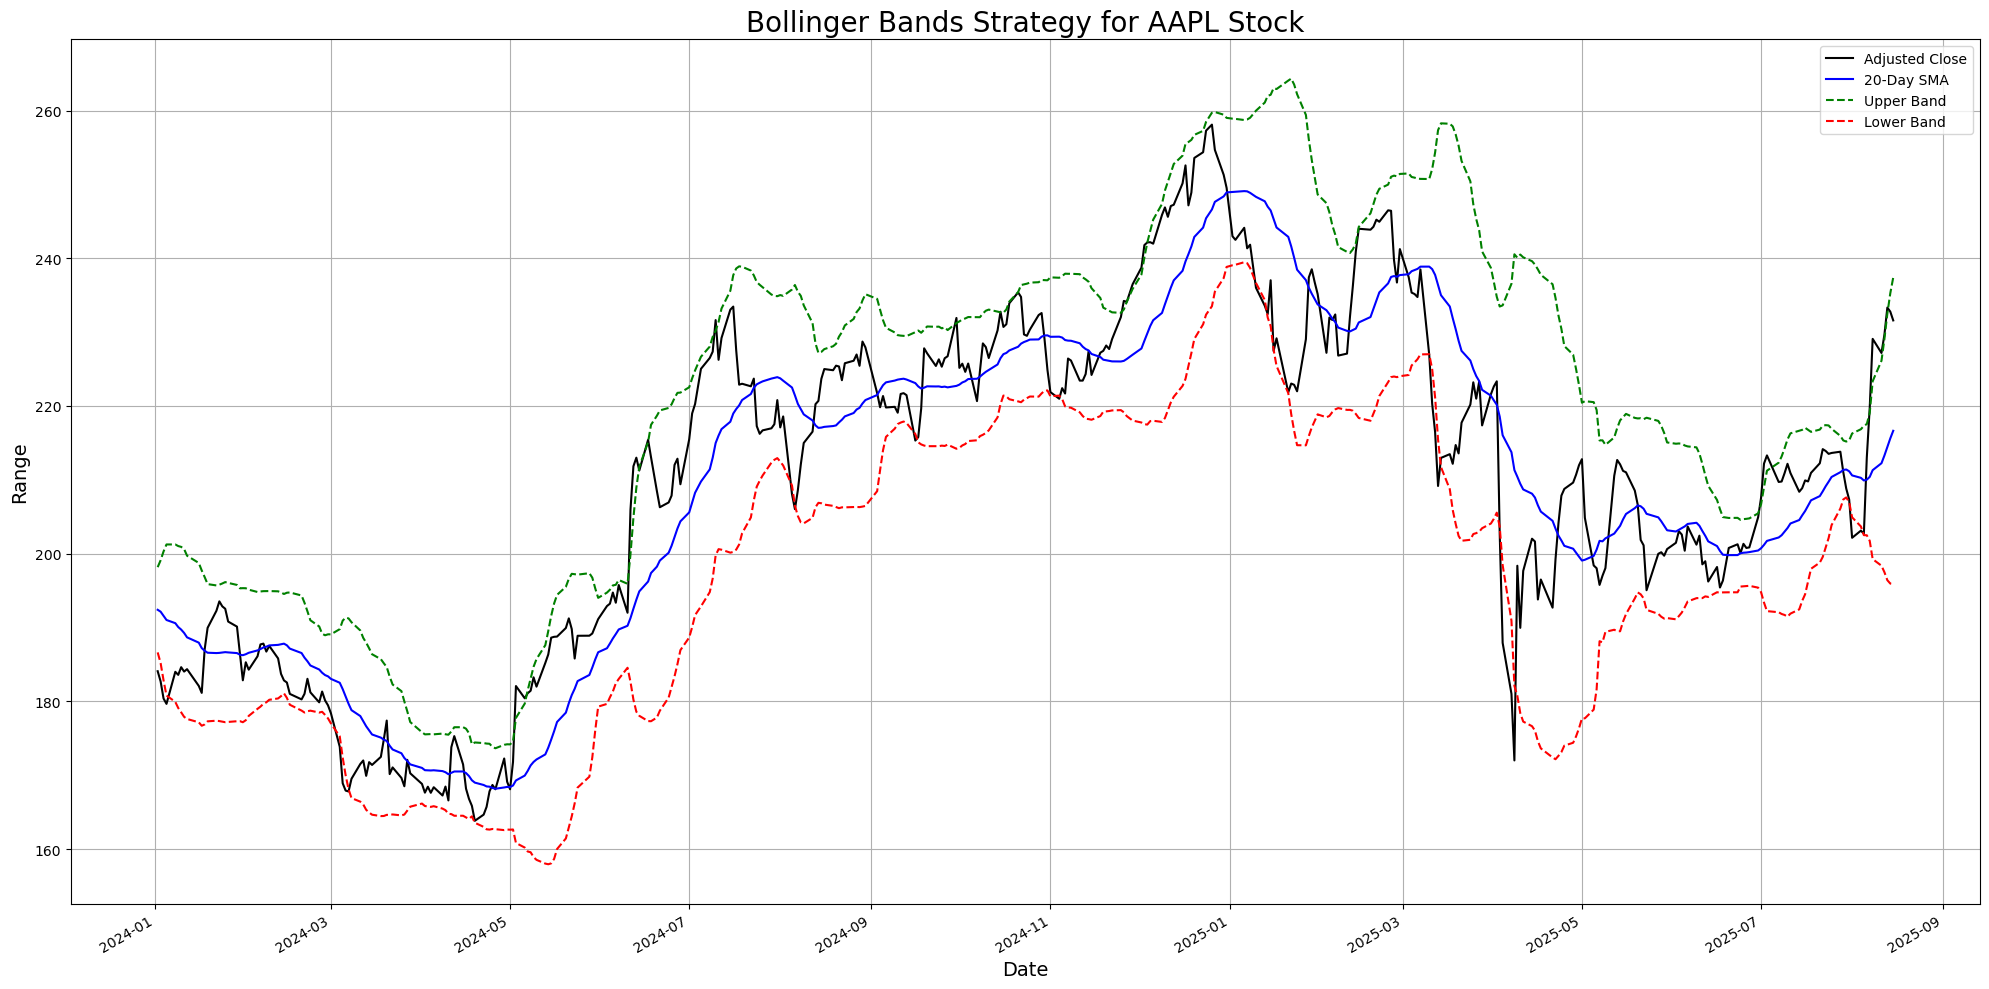

In [13]:
# --- Calculate SMA and Standard Desviation ---
assets['SMA_20'] = assets.groupby('ticker')['Adj Close'].transform(lambda x: x.rolling(window = 20).mean())
assets['SD_20'] = assets.groupby('ticker')['Adj Close'].transform(lambda x: x.rolling(window=20).std())

# --- Calculate Bollinger Bands ---
assets['Upper_Band'] = assets['SMA_20'] + 2*assets['SD_20']
assets['Lower_Band'] = assets['SMA_20'] - 2*assets['SD_20']

# --- Generate Signals ---
assets['Bollinger_Signal_Action'] = np.where(assets['Adj Close'] < assets['Lower_Band'], 1.0, 0.0)
assets['Bollinger_Signal_Position'] = assets['Bollinger_Signal_Action'].diff()

# --- Filter Company Data ---
share = assets[assets['ticker'] == company].copy()
share = share[(share.index >= startt) & (share.index <= endt)]

# --- Plotting ---
plt.figure(figsize=(20, 10))
    # Plot short-term and long-term ATR
share['Adj Close'].plot(label='Adjusted Close', color='black')
share['SMA_20'].plot(label='20-Day SMA', color='blue')
share['Upper_Band'].plot(label='Upper Band', linestyle='--', color='green')
share['Lower_Band'].plot(label='Lower Band', linestyle='--', color='red')
    # Labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Range', fontsize=14)
plt.title(f'Bollinger Bands Strategy for {company} Stock', fontsize=20)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Rate of Change (ROC)

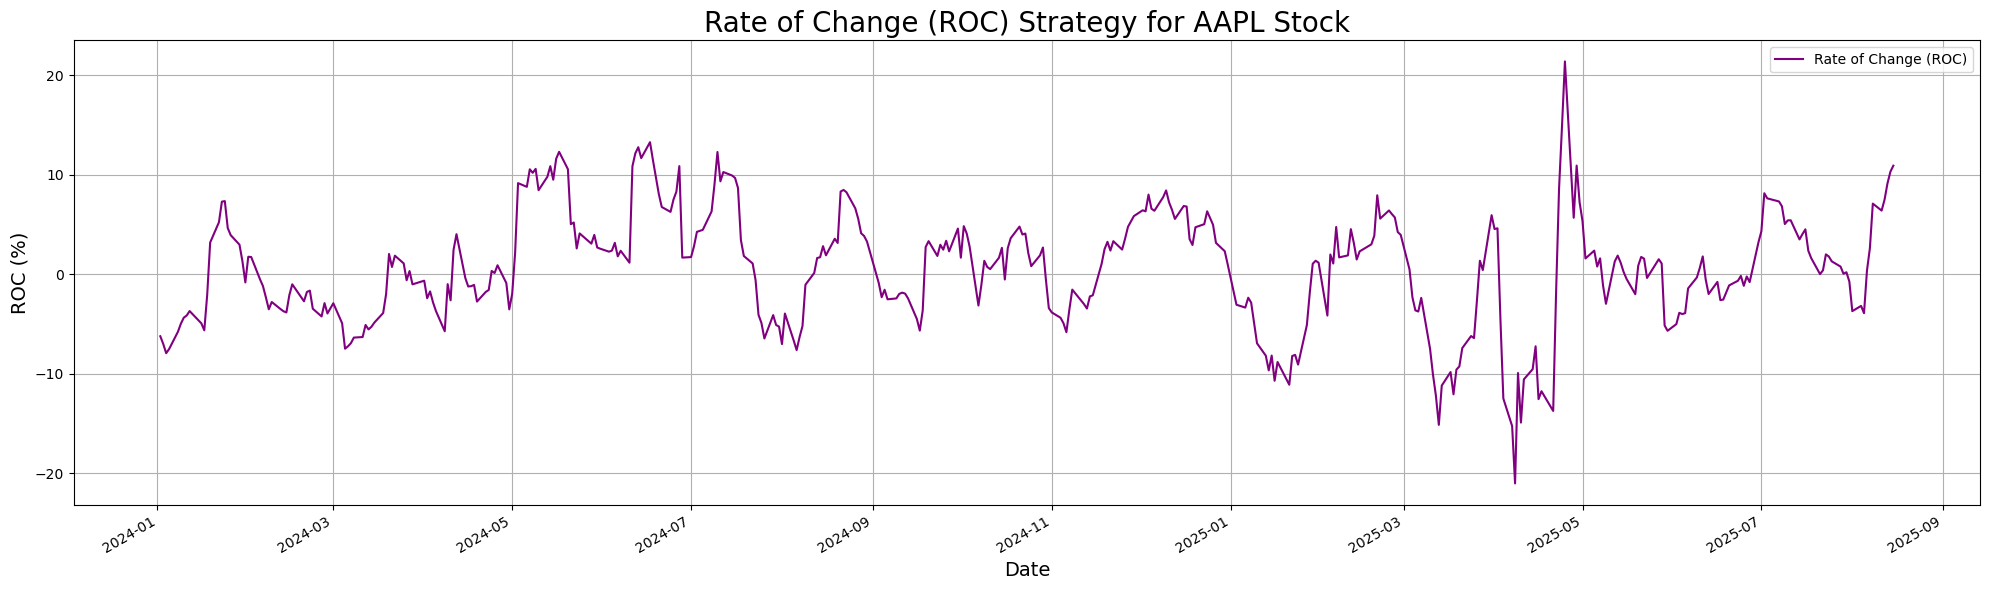

In [14]:
# --- Calculate ROC ---
assets['ROC'] = assets.groupby('ticker')['Adj Close'].transform(
    lambda x: ((x - x.shift(12)) / x.shift(12)) * 100
)

# --- Filter Company Data ---
share = assets[assets['ticker'] == company].copy()
share = share[(share.index >= startt) & (share.index <= endt)]

# --- Plotting ---
plt.figure(figsize=(20, 6))
share['ROC'].plot(label='Rate of Change (ROC)', color='purple')
    # Labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('ROC (%)', fontsize=14)
plt.title(f'Rate of Change (ROC) Strategy for {company} Stock', fontsize=20)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### On-Balance Volume (OBV)

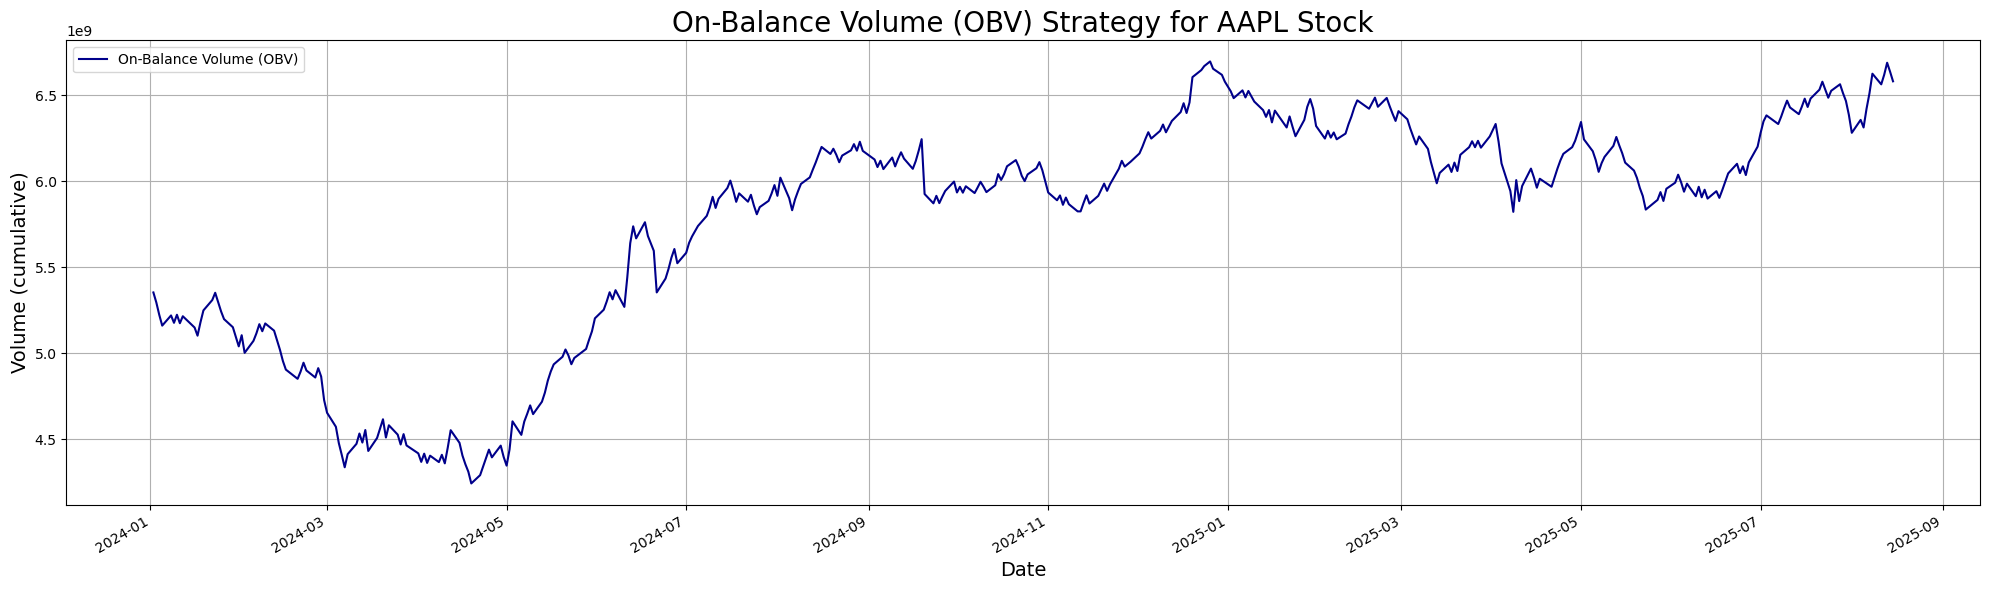

In [15]:
# Calcular dirección del precio: +1 si sube, -1 si baja, 0 si igual
assets['price_direction'] = np.sign(assets.groupby('ticker')['Adj Close'].transform(lambda x: x.diff()))

# Multiplicar por volumen para obtener volumen ajustado
assets['volume_adjusted'] = assets['price_direction'] * assets['Volume']

# OBV es la suma acumulada de ese volumen ajustado
assets['OBV'] = assets.groupby('ticker')['volume_adjusted'].transform(lambda x: x.fillna(0).cumsum())

# --- Filter Company Data ---
share = assets[assets['ticker'] == company].copy()
share = share[(share.index >= startt) & (share.index <= endt)]

# --- Plotting ---
plt.figure(figsize=(20, 6))
share['OBV'].plot(label='On-Balance Volume (OBV)', color='darkblue')
    # Labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume (cumulative)', fontsize=14)
plt.title(f'On-Balance Volume (OBV) Strategy for {company} Stock', fontsize=20)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()